**Amin Fathi 400722012**

## **Import libraries**

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow import keras
from tensorflow.keras import layers
                              
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

## **Download the dataset**

Download the datasets from the below links.

https://drive.google.com/file/d/1-16czyoJl7r_Z09NuJ06wPaPkVCsffk7/view?usp=sharing

https://drive.google.com/file/d/1-H6FuinqOeGFVCEvoJAGSMw7V_wa3Lhf/view?usp=sharing

First link is without preprocessing, but the second link has been preprocessed.

Use the below link to know how to work with the data. The file "datasets_preparing.py" in the link can help you alot!

https://www.kaggle.com/valentynsichkar/traffic-signs-preprocessed


In [ ]:
!gdown --id 1-H6FuinqOeGFVCEvoJAGSMw7V_wa3Lhf
!gdown --id 1-16czyoJl7r_Z09NuJ06wPaPkVCsffk7

Downloading...
From: https://drive.google.com/uc?id=1-H6FuinqOeGFVCEvoJAGSMw7V_wa3Lhf
To: /content/data3.pickle
100% 1.28G/1.28G [00:09<00:00, 129MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-16czyoJl7r_Z09NuJ06wPaPkVCsffk7
To: /content/data0.pickle
100% 477M/477M [00:09<00:00, 49.3MB/s]


In [ ]:
d = pickle.load( open('data0.pickle', 'rb'))


In [ ]:
data0 =pd.DataFrame.from_dict(d, orient='index')

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [ ]:
X_test0 = data0.iloc[0][0]
y_validation0 = data0.iloc[1][0]
X_validation0 = data0.iloc[2][0]
labels0 = data0.iloc[3][0]
X_train0 = data0.iloc[4][0]
y_test0 = data0.iloc[5][0]
y_train0 = data0.iloc[6][0]
X_test0 = X_test0.transpose(0, 2, 3, 1)
X_train0 = X_train0.transpose(0, 2, 3, 1)
X_validation0 = X_validation0.transpose(0, 2, 3, 1)


In [ ]:
#load data3.pickle
d3 = pickle.load(open('data3.pickle', 'rb'))
data3 =pd.DataFrame.from_dict(d3, orient='index')

In [ ]:

def read_data(file_path):
  with open(file_path,'rb') as f:
    data = pickle.load(f, encoding='latin1')
    data['x_train'] = np.transpose(data['x_train'],(0,2,3,1))
    data['x_validation'] = np.transpose(data['x_validation'],(0,2,3,1))
    data['x_test'] = np.transpose(data['x_test'],(0,2,3,1))
    return data

In [ ]:
data = read_data('data3.pickle')
X_train3 = data['x_train']
X_validation3 = data['x_validation']
x_test = data['x_test']
y_train3 = tf.keras.utils.to_categorical(data['y_train'])
y_val3 = tf.keras.utils.to_categorical(data['y_validation'])
y_test = tf.keras.utils.to_categorical(data['y_test'])
# Convert class vectors to binary class matrices.

print(y_test.shape)
print(X_train3.shape)
                         

(12630, 43)
(86989, 32, 32, 3)


## **Display the dataset**

Plot some samples from the first dataset to see and know what are you working with. 

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


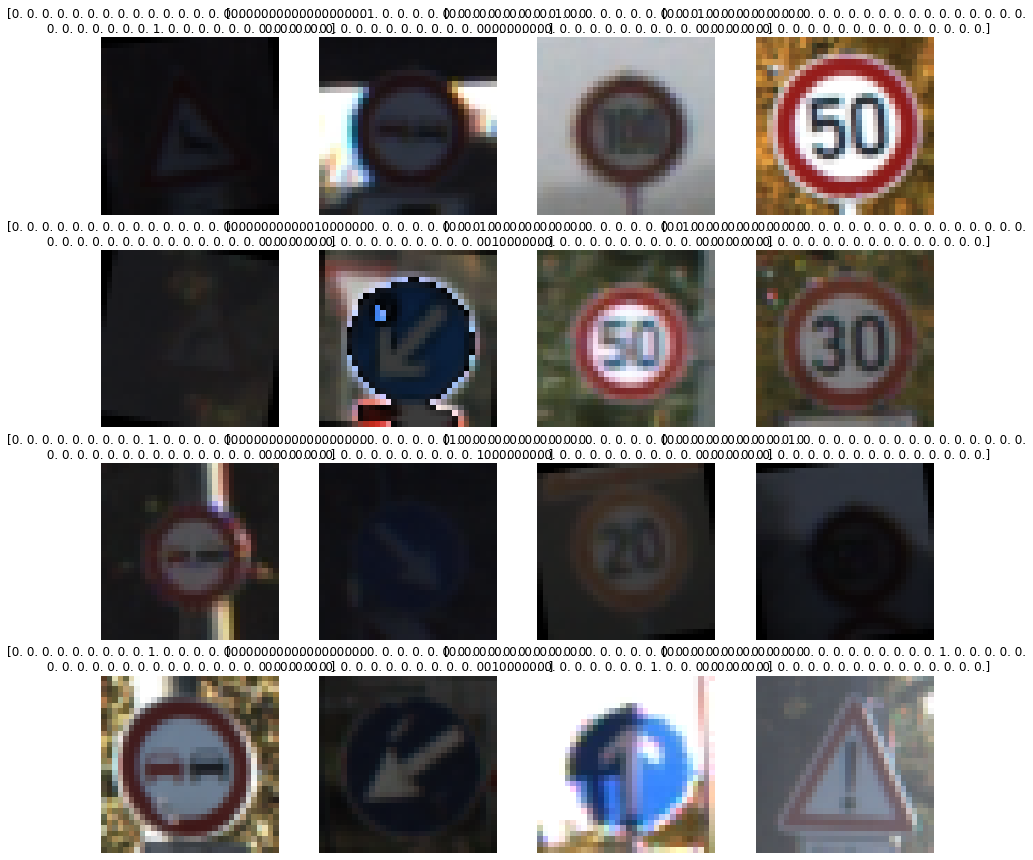

In [ ]:
fig, axes = plt.subplots(4,4, figsize=(15,15))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X_train0.shape[0])
    ax.imshow(X_train0[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title(y_train3[r])

## **Build the ResNet Model**

Model's architecutre is given in the below tables. By entering each stage (except the first stage), the number of filters is doubled and the spatial resolution is halved. You should use appropriate hyperparameters (kernel-size, no-filter, ...) to achieve at least 85% accuracy.

<center>
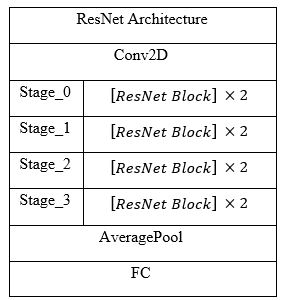
</center>
<h3><center> Model's architecture </center></h3>

<center>
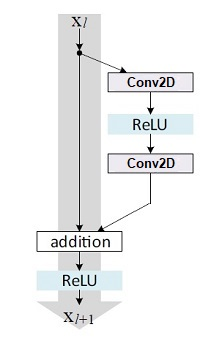
</center>

<h3><center> ResNet block architecture </center><h3>

In [ ]:
data_augmentation = keras.Sequential([])
# function for creating an identity or projection residual module
def residual_block(x,filters,kernel_size =3 ,down_sample=False):
  y = Conv2D(filters=filters,kernel_size=kernel_size,strides=(1 if not down_sample else 2),padding='same',activation='relu')(x)
  y = Conv2D(filters=filters,kernel_size=kernel_size,padding='same')(y)
  if down_sample:
    x = Conv2D(filters=filters,kernel_size=1,strides=2,padding='same')(x)
  xy = Add()([x,y])
  out = Activation('relu')(xy)
  return out

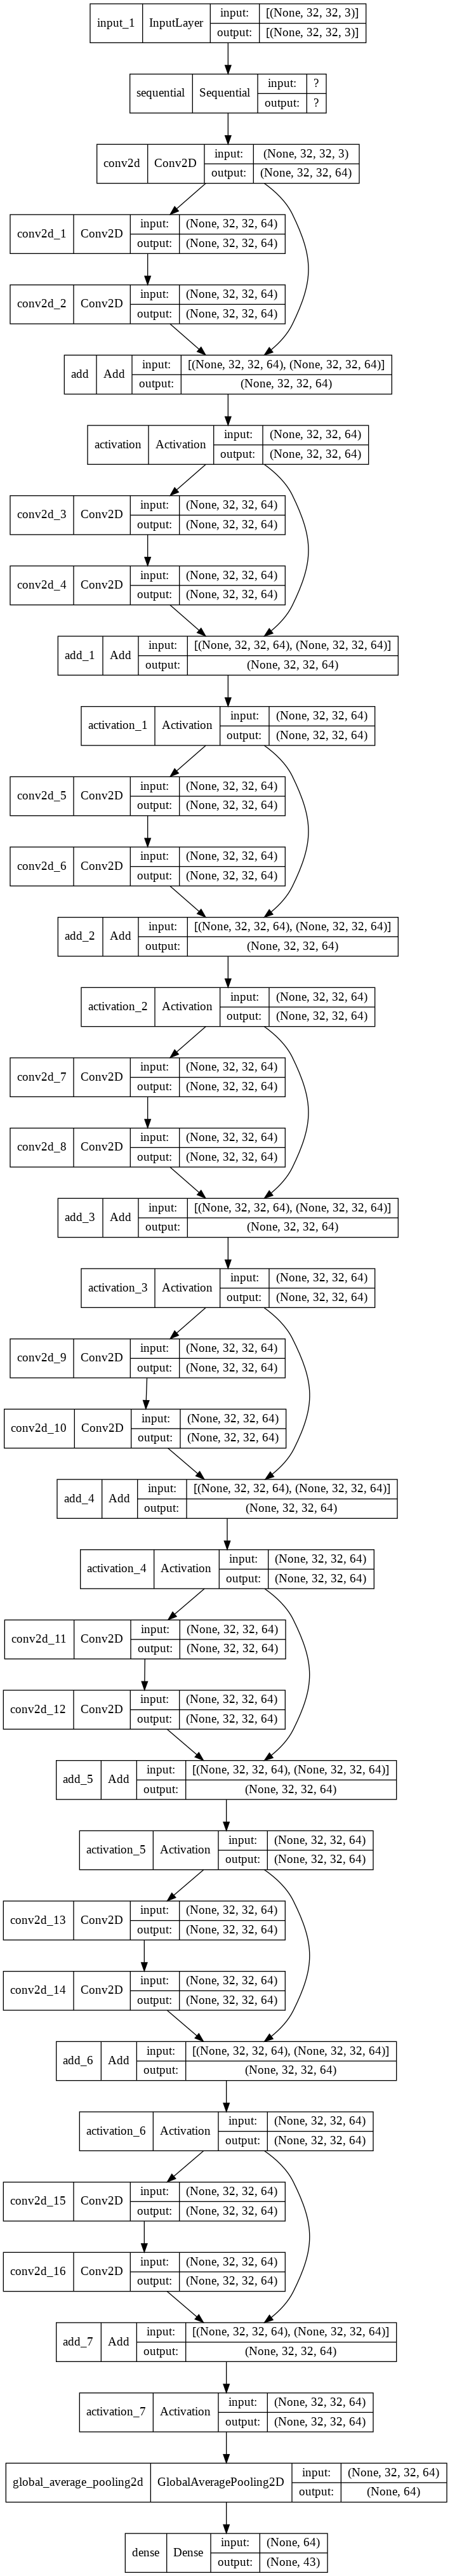

In [ ]:
def make_model(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)


    x1 = layers.Conv2D(64, 3, padding="same", activation = "relu")(x)
    
    x2 =residual_block(x1 , 64,3)
    x3=residual_block(x2 , 64,3)

    x4=residual_block(x3,64,3)
    x5 =residual_block(x4,64,3)

    x6= residual_block(x5,64,3)
    x7= residual_block(x6,64,3)

    x8=residual_block(x7,64,3)
    x9=residual_block(x8,64,3)
    x17 = layers.GlobalAveragePooling2D()(x9)

    outputs= layers.Dense(units = 43, activation="softmax")(x17)

    


    return keras.Model(inputs, outputs)


model = make_model(input_shape=(32,32,3))
keras.utils.plot_model(model, show_shapes=True)

## **Train the model**

Train the model on the second dataset (preprocessed)

In [ ]:
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(
    x=X_train3,y=y_train3, batch_size=64 , epochs=epochs, callbacks=callbacks,validation_data=(X_validation3 , y_val3)
)


Epoch 1/20
1360/1360 [==============================] - 196s 136ms/step - loss: 1.9688 - accuracy: 0.4106 - val_loss: 0.6986 - val_accuracy: 0.8254


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 2/20
1360/1360 [==============================] - 185s 136ms/step - loss: 0.2313 - accuracy: 0.9329 - val_loss: 0.2508 - val_accuracy: 0.9420
Epoch 3/20
1360/1360 [==============================] - 185s 136ms/step - loss: 0.1141 - accuracy: 0.9675 - val_loss: 0.1122 - val_accuracy: 0.9687
Epoch 4/20
1360/1360 [==============================] - 185s 136ms/step - loss: 0.0879 - accuracy: 0.9749 - val_loss: 0.1404 - val_accuracy: 0.9610
Epoch 5/20
1360/1360 [==============================] - 186s 137ms/step - loss: 0.0729 - accuracy: 0.9798 - val_loss: 0.0893 - val_accuracy: 0.9762
Epoch 6/20
1360/1360 [==============================] - 184s 136ms/step - loss: 0.0627 - accuracy: 0.9824 - val_loss: 0.1497 - val_accuracy: 0.9615
Epoch 7/20
1360/1360 [==============================] - 184s 136ms/step - loss: 0.0579 - accuracy: 0.9841 - val_loss: 0.0666 - val_accuracy: 0.9821
Epoch 8/20
1360/1360 [==============================] - 184s 135ms/step - loss: 0.0457 - accuracy: 0.9874 - val_

## **Test the model**

In [ ]:
history2 =model.evaluate(x_test, y_test, batch_size=64 , verbose=2)

198/198 - 8s - loss: 0.1474 - accuracy: 0.9714 - 8s/epoch - 42ms/step


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

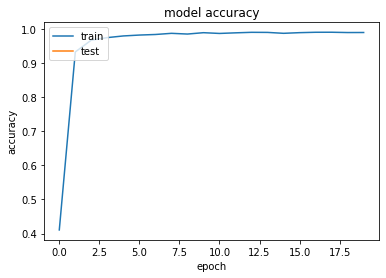

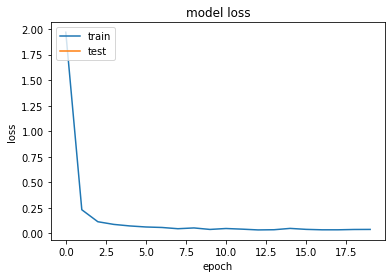

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history2[1])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history2[0])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

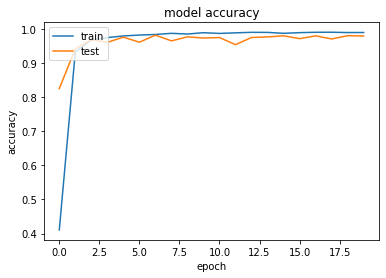

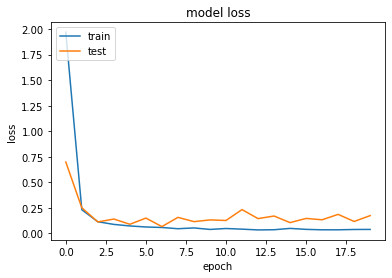

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()